# Import required library

Goal: predictions for April, May, June, July, August, September 2021.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/kaggle/input/forecast/forecast.csv')
df.head()

,DATE,CC Volume
0,1/1/2017,31
1,1/2/2017,251
2,1/3/2017,518
3,1/4/2017,414
4,1/5/2017,420


In [3]:
df.tail()

,DATE,CC Volume
1536,3/18/2021,559
1537,3/19/2021,507
1538,3/20/2021,105
1539,3/21/2021,52
1540,3/22/2021,402


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       1541 non-null   object
 1   CC Volume  1541 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.2+ KB


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df

,DATE,CC Volume
0,2017-01-01,31
1,2017-01-02,251
2,2017-01-03,518
3,2017-01-04,414
4,2017-01-05,420
...,...,...
1536,2021-03-18,559
1537,2021-03-19,507
1538,2021-03-20,105
1539,2021-03-21,52


In [7]:
df = df.rename(columns={'CC Volume': 'y', 'DATE':'ds'})

In [8]:
df.tail()

,ds,y
1536,2021-03-18,559
1537,2021-03-19,507
1538,2021-03-20,105
1539,2021-03-21,52
1540,2021-03-22,402


In [9]:
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])

In [10]:
df.head(10)

,ds,y,y_orig
0,2017-01-01,3.433987,31
1,2017-01-02,5.525453,251
2,2017-01-03,6.249975,518
3,2017-01-04,6.025866,414
4,2017-01-05,6.040255,420
5,2017-01-06,6.061457,429
6,2017-01-07,4.477337,88
7,2017-01-08,4.094345,60
8,2017-01-09,6.091310,442
9,2017-01-10,6.082219,438


# Fit The Prophet mode on dataset

In [11]:
model = Prophet() #instantiate Prophet
model.fit(df)

In [12]:
df.tail(5)

,ds,y,y_orig
1536,2021-03-18,6.326149,559
1537,2021-03-19,6.228511,507
1538,2021-03-20,4.653960,105
1539,2021-03-21,3.951244,52
1540,2021-03-22,5.996452,402


In [23]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

df.tail(5)
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=193)
future_data.tail()

,ds
1729,2021-09-27
1730,2021-09-28
1731,2021-09-29
1732,2021-09-30
1733,2021-10-01


In [24]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
1719,2021-09-17,6.337924,5.867833,6.811577
1720,2021-09-18,4.720118,4.233948,5.179823
1721,2021-09-19,4.324923,3.887993,4.748643
1722,2021-09-20,6.482836,6.022128,6.931127
1723,2021-09-21,6.491011,6.027487,6.978105
1724,2021-09-22,6.455407,5.986012,6.891902
1725,2021-09-23,6.407461,5.956426,6.842918
1726,2021-09-24,6.387083,5.946112,6.870491
1727,2021-09-25,4.752164,4.286563,5.206257
1728,2021-09-26,4.339078,3.879537,4.759361


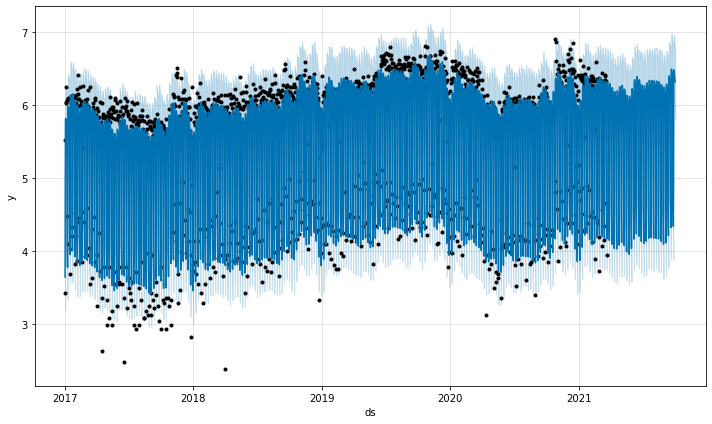

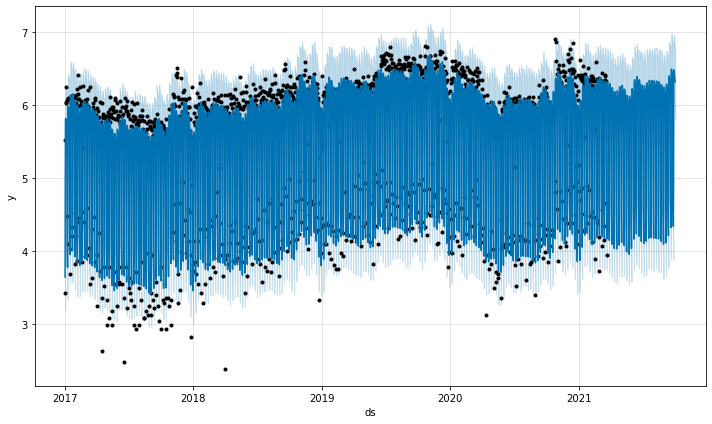

In [25]:
model.plot(forecast_data)

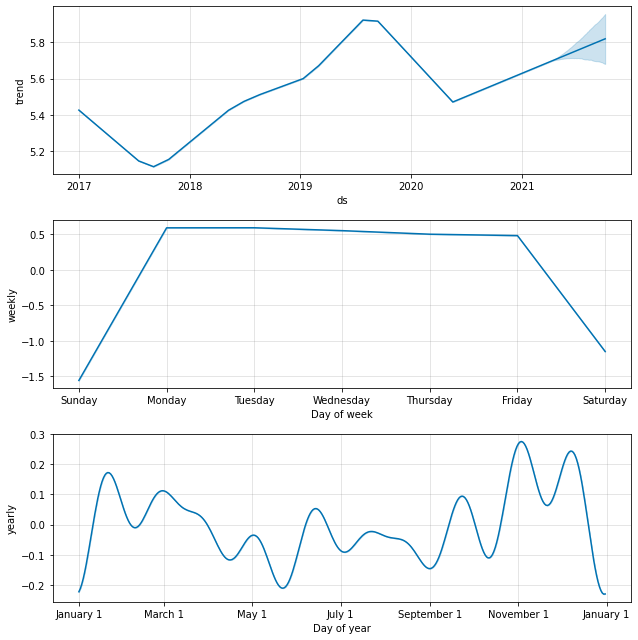

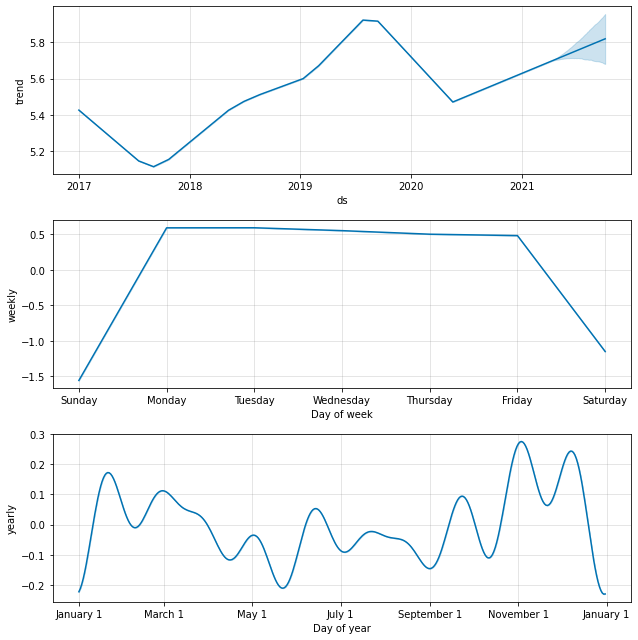

In [26]:
model.plot_components(forecast_data)

In [27]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

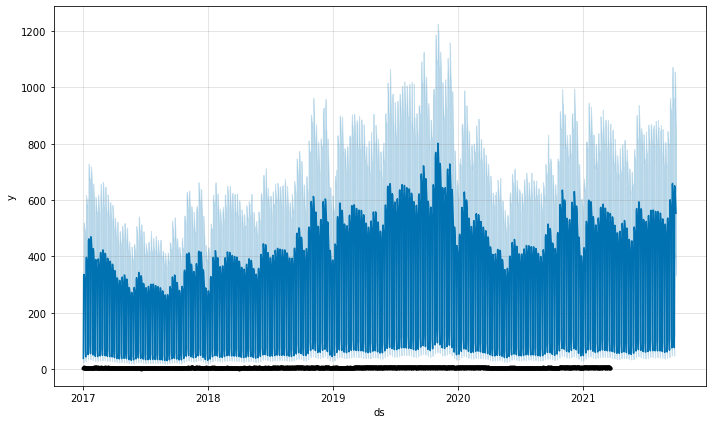

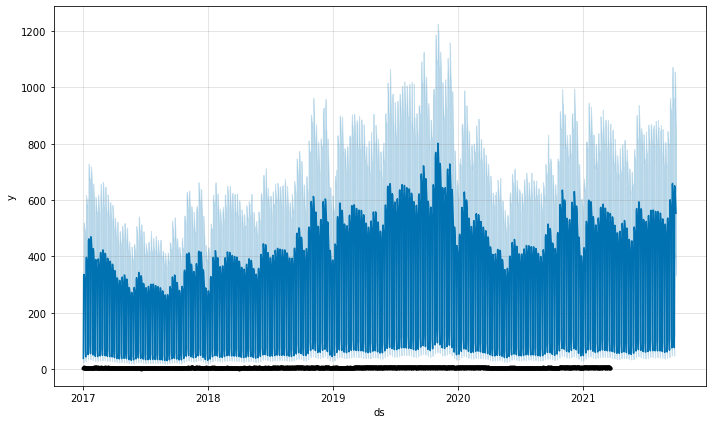

In [28]:
model.plot(forecast_data_orig)

In [29]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [30]:
final_df = pd.DataFrame(forecast_data_orig)

In [31]:
final_df.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1719,2021-09-17,5.809057,353.482120,908.301881,5.690943,5.928569,0.528867,0.528867,0.528867,0.480135,0.480135,0.480135,0.048732,0.048732,0.048732,0.0,0.0,0.0,565.620712
1720,2021-09-18,5.809749,68.989085,177.651421,5.690544,5.930306,-1.089631,-1.089631,-1.089631,-1.151445,-1.151445,-1.151445,0.061814,0.061814,0.061814,0.0,0.0,0.0,112.181500
1721,2021-09-19,5.810441,48.812815,115.427578,5.690145,5.932328,-1.485518,-1.485518,-1.485518,-1.558552,-1.558552,-1.558552,0.073034,0.073034,0.073034,0.0,0.0,0.0,75.559704
1722,2021-09-20,5.811133,412.455388,1023.647248,5.689745,5.934353,0.671703,0.671703,0.671703,0.589597,0.589597,0.589597,0.082106,0.082106,0.082106,0.0,0.0,0.0,653.822698
1723,2021-09-21,5.811825,414.671691,1072.883036,5.689170,5.935392,0.679187,0.679187,0.679187,0.590392,0.590392,0.590392,0.088794,0.088794,0.088794,0.0,0.0,0.0,659.189783
1724,2021-09-22,5.812517,397.824942,984.272049,5.688111,5.936503,0.642890,0.642890,0.642890,0.549973,0.549973,0.549973,0.092917,0.092917,0.092917,0.0,0.0,0.0,636.132691
1725,2021-09-23,5.813209,386.227471,937.219584,5.687085,5.938458,0.594252,0.594252,0.594252,0.499899,0.499899,0.499899,0.094353,0.094353,0.094353,0.0,0.0,0.0,606.351959
1726,2021-09-24,5.813901,382.264168,963.421715,5.686058,5.940752,0.573182,0.573182,0.573182,0.480135,0.480135,0.480135,0.093047,0.093047,0.093047,0.0,0.0,0.0,594.120993
1727,2021-09-25,5.814593,72.716134,182.410094,5.685492,5.943045,-1.062429,-1.062429,-1.062429,-1.151445,-1.151445,-1.151445,0.089016,0.089016,0.089016,0.0,0.0,0.0,115.834622
1728,2021-09-26,5.815285,48.401800,116.671356,5.684341,5.945339,-1.476206,-1.476206,-1.476206,-1.558552,-1.558552,-1.558552,0.082345,0.082345,0.082345,0.0,0.0,0.0,76.636875


In [32]:
final_df[['ds','yhat']].tail(15)

,ds,yhat
1719,2021-09-17,565.620712
1720,2021-09-18,112.181500
1721,2021-09-19,75.559704
1722,2021-09-20,653.822698
1723,2021-09-21,659.189783
1724,2021-09-22,636.132691
1725,2021-09-23,606.351959
1726,2021-09-24,594.120993
1727,2021-09-25,115.834622
1728,2021-09-26,76.636875


In [38]:
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

In [33]:
df = final_df.rename(columns={'yhat':'CC Volume', 'ds':'DATE'})

In [34]:
df[['DATE','CC Volume']].tail(20)

,DATE,CC Volume
1714,2021-09-12,67.658404
1715,2021-09-13,590.200461
1716,2021-09-14,601.261547
1717,2021-09-15,587.537304
1718,2021-09-16,568.142408
1719,2021-09-17,565.620712
1720,2021-09-18,112.181500
1721,2021-09-19,75.559704
1722,2021-09-20,653.822698
1723,2021-09-21,659.189783


In [37]:
df.columns

Index(['DATE', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper',
       'CC Volume'],
      dtype='object')

In [41]:
df.drop(['trend', 'trend_lower',
       'trend_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper'],axis = 1,inplace = True)

In [42]:
df.to_csv('Future_forecast.csv', index=False)